In [1]:
from data.data_reading import data_reading
from data.data_processing import data_processing
from ruspy.estimation.estimation_transitions import estimate_transitions
from ruspy.estimation.estimation_cost_parameters import create_transition_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
beta = 0.9999
init_dict = {
    "groups": "group_4",
    "binsize": 1000,
}

In [3]:
data_reading()
repl_data = data_processing(init_dict)
trans_results= estimate_transitions(repl_data)
print(trans_results)

{'state_count': array([[29, 12, 10, ...,  0,  0,  0],
       [ 0, 12,  2, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]]), 'x': array([2.86579683e-02, 8.10810811e-02, 2.79123952e-01, 2.46039143e-01,
       1.81733458e-01, 1.30242311e-01, 4.65983225e-02, 3.72786580e-03,
       4.65983225e-04, 6.98974837e-04, 9.31966449e-04, 4.65983225e-04,
       2.32991612e-04]), 'fun': 7581.755518761861, 'trans_count': array([ 123,  348, 1198, 1056,  780,  559,  200,   16,    2,    3,    4,
          2,    1])}


In [4]:
max_state = trans_results["state_count"].shape[0]  # 388
num_bins = 50

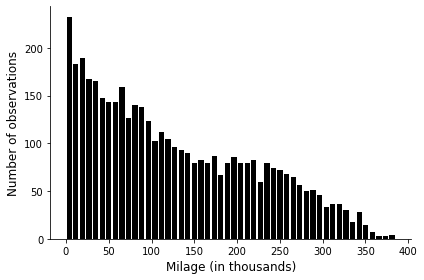

In [5]:
numobs_per_state = trans_results["state_count"].sum(axis=1)
hist_data = np.array([])
for i, val in enumerate(numobs_per_state):
    hist_data = np.append(hist_data, np.full(val, i))
hist_data = hist_data * init_dict["binsize"] / 1000

fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"Number of observations")
ax.set_xlabel(r"Milage (in thousands)")
# ax.set_ylim([0, 1.15 * numobs_per_state[0]])
ax.hist(hist_data, bins=num_bins, color="black", rwidth=0.8)

plt.savefig('{:}/fig-introduction-observations-mileage'.format(DIR_FIGURES))

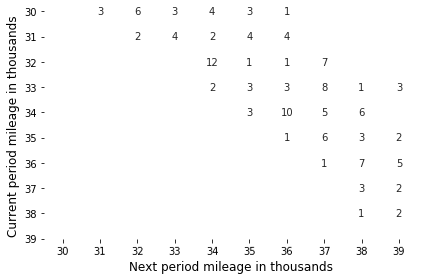

In [6]:
state_mat = trans_results["state_count"]
# trans_mat = state_mat / state_mat.sum(axis=1)[:, None]
# trans_mask = np.ones((state_mat.shape), dtype=bool)
# for i in range(state_mat.shape[0]):
#     trans_mask[i, i: i + len(trans_results['x'])] = False
trans_mask = state_mat == 0
start = 30
end = 40
index = range(start, end, 1)

fig, ax = plt.subplots(1, 1)
sns.heatmap(
    state_mat[start:end, start:end],
    mask=trans_mask[start:end, start:end],
    ax=ax,
    annot=True,
    cmap=ListedColormap(['white']),
#     linewidths=1,
#     linecolor='k',
    cbar=False,
    xticklabels=index,
    yticklabels=index,
)
ax.set_ylabel(r"Current period mileage in thousands")
ax.set_xlabel(r"Next period mileage in thousands")
# ax.set_ylim([start - 1, end + 1])
plt.xticks(rotation=1)
plt.yticks(rotation=0)

plt.savefig('{:}/fig-introduction-transition-matrix'.format(DIR_FIGURES))


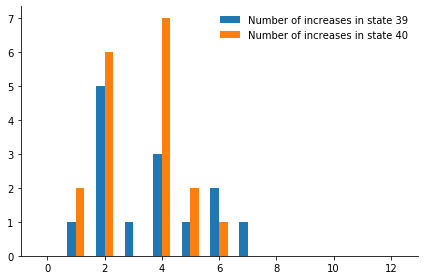

In [30]:
fig, ax = plt.subplots(1, 1)

state_0 = 39
state_1 = 40

width = 0.3
num_bins = len(trans_results["x"])
bins = np.arange(num_bins)

ax.bar(bins - width / 2, state_mat[state_0, state_0: state_0 + num_bins], width, label=f"Number of increases in state {state_0}")
ax.bar(bins + width / 2, state_mat[state_1, state_1: state_1 + num_bins], width, label=f"Number of increases in state {state_1}")

ax.legend()
fig.savefig(f"{DIR_FIGURES}/fig-introduction-num_transitions")

In [15]:
for i in range(state_mat.shape[0]):
    print(np.sum(state_mat[i, i : i + 6]/ np.sum(state_mat[i, i : i + 13])),  len(np.nonzero(state_mat[i, :])[0]), np.sum(state_mat, axis=1)[i], i)

0.9315068493150684 11 73 0
0.8684210526315789 9 38 1
0.7777777777777777 9 27 2
0.9090909090909092 7 11 3
1.0 5 22 4
0.9999999999999999 5 18 5
0.9333333333333333 4 15 6
1.0 6 28 7
1.0 5 25 8
1.0 5 17 9
0.9999999999999999 5 23 10
1.0 4 26 11
0.8695652173913043 7 23 12
0.9199999999999999 6 25 13
1.0 5 18 14
0.8846153846153846 7 26 15
1.0000000000000002 5 26 16
1.0 5 19 17
0.9666666666666667 6 30 18
0.9090909090909092 8 22 19
1.0 4 25 20
1.0 5 17 21
1.0000000000000002 6 26 22
0.88 7 25 23
0.9615384615384616 7 26 24
0.9523809523809523 7 21 25
0.9999999999999999 5 22 26
0.9677419354838708 7 31 27
1.0 5 15 28
0.96875 7 32 29
0.9500000000000001 6 20 30
1.0 5 16 31
1.0 4 21 32
0.8500000000000001 6 20 33
0.9230769230769231 5 26 34
0.8666666666666667 6 15 35
0.9499999999999998 6 20 36
0.7692307692307694 6 26 37
0.9047619047619047 7 21 38
0.7857142857142857 7 14 39
0.9444444444444444 5 18 40
0.894736842105263 6 19 41
0.9473684210526315 6 19 42
0.9565217391304348 6 23 43
0.894736842105263 5 19 44
0

/home/maxbl/anaconda3/envs/ruspy_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
